In [1]:
# import pandas
import pandas as pd

In [2]:
import os

In [3]:
# not working with jupyter
# base_path = os.path.dirname(os.path.realpath(__file__))
base_path = os.path.join(os.getcwd(), 'data')

#### enter here which files to use ####
operation = 'filter_version_statuses'

modified_path = os.path.join(base_path, 'modified')
# add subdir dropna
modified_path = os.path.join(modified_path, operation)

# add subdir merged
modified_path = os.path.join(modified_path, 'merged')

# merged frame
merged_frame_path = os.path.join(modified_path, 'ff4-all-merged-filter_version_statuses.csv')

In [4]:
# load frame

data_frame = pd.read_csv(filepath_or_buffer=merged_frame_path, 
                                header=0, encoding='iso-8859-1', sep=';')


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# show info
print(data_frame.info())
data_frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367480 entries, 0 to 367479
Data columns (total 24 columns):
transportorder_id                   367480 non-null object
quantity                            367480 non-null float64
colli_type                          362437 non-null object
gross_weight_g                      367480 non-null float64
height_mm                           367480 non-null float64
width_mm                            367480 non-null float64
length_mm                           367480 non-null float64
stackability                        367480 non-null float64
issue_type_code                     367480 non-null float64
created_date                        367480 non-null object
updated_date                        367480 non-null object
incoterm                            367423 non-null object
owner_company_key                   367480 non-null object
consignor_location_key              367470 non-null object
recipient_location_key              367466 non-null obje

,transportorder_id,quantity,colli_type,gross_weight_g,height_mm,width_mm,length_mm,stackability,issue_type_code,created_date,...,recipient_location_key,pickup_date_from,pickup_date_to,delivery_date_from,delivery_date_to,steering_partner_id,pickup_location_key,delivery_location_key,delivery_time_seconds,time_to_order_fulfilment_seconds
0,10000930,1.0,CLL,245000.0,1100.0,800.0,1210.0,999.0,0.0,2014-10-29 15:55:27,...,6580,2015-03-25 10:00:01,2015-03-25 16:00:59,2015-03-26 15:00:01,2015-03-26 17:00:59,FF4S000371,24546,6580,111658,88401
1,10001898,3.0,CLL,546000.0,1100.0,800.0,1210.0,999.0,0.0,2014-12-02 09:57:04,...,6580,2015-02-16 13:30:01,2015-02-16 16:00:59,2015-02-17 08:00:01,2015-02-17 15:00:59,FF4S000371,45698,6580,91858,8594
2,10004223,7.0,NaN,2000000.0,800.0,800.0,1200.0,999.0,0.0,2015-01-30 14:27:55,...,1000_4flowplant,2015-02-04 08:00:01,2015-02-04 16:00:59,2015-02-06 17:00:01,2015-02-06 22:00:59,FF4S4FLOW2,1000_4flowsupplier,1000_4flowplant,223258,408726
3,10004227,2.0,NaN,190000.0,1200.0,1200.0,800.0,2.0,0.0,2015-01-30 14:38:52,...,0097156736,2015-02-04 09:00:01,2015-02-04 16:00:59,2015-02-05 10:00:01,2015-02-05 16:00:59,FF4S000373,5000000447,0097156736,111658,411669
4,10004228,8.0,NaN,1160000.0,1000.0,800.0,1200.0,2.0,0.0,2015-01-30 14:59:58,...,6580,2015-02-03 13:00:01,2015-02-03 16:00:59,2015-02-06 00:00:01,2015-02-06 23:59:59,FF4S000371,74973,6580,298798,338402
5,10004229,2.0,NaN,559000.0,500.0,800.0,1210.0,1.0,0.0,2015-01-30 15:22:10,...,3000,2015-02-03 13:00:01,2015-02-03 16:00:59,2015-02-06 00:00:01,2015-02-06 23:59:59,FF4S000372,76634,3000,298798,337071
6,10004230,1.0,CLL,108000.0,620.0,640.0,870.0,1.0,0.0,2015-01-30 17:21:34,...,3000,2015-02-03 08:00:01,2015-02-03 16:00:59,2015-02-06 00:00:01,2015-02-06 04:00:59,FF4S000372,97186049,3000,244858,311907
7,10004231,23.0,CLL,13800000.0,1200.0,800.0,1200.0,2.0,0.0,2015-02-02 07:02:50,...,3000,2015-02-03 13:00:01,2015-02-03 18:00:59,2015-02-09 08:00:01,2015-02-09 09:00:59,FF4S000372,364268-02,3000,504058,107831
8,10004233,3.0,NaN,480000.0,1100.0,1600.0,1000.0,999.0,0.0,2015-02-02 07:54:40,...,0097156736,2015-02-05 07:00:01,2015-02-05 15:00:59,2015-02-06 14:30:01,2015-02-06 15:30:59,FF4S000373,5000003658-01,0097156736,117058,255920
9,10004234,1.0,NaN,57000.0,650.0,800.0,1200.0,1.0,0.0,2015-02-02 08:18:26,...,6580,2015-02-03 08:00:01,2015-02-03 16:00:59,2015-02-05 15:00:01,2015-02-05 17:00:59,FF4S000371,6770,6580,205258,85295


In [6]:
################################################################################################################################
####                                           actual preprocessing starts here                                             ####
################################################################################################################################
# treat columns differently according to nature of the respective col
# manuall structuring of columns

drop_list = ['transportorder_id',
             'created_date',
             'updated_date'
             # also drop some of the categorical labels for now
             #'owner_company_key',
             #'consignor_location_key', 
             #'recipient_location_key',
             #'steering_partner_id'
            ]
label_list = ['issue_type_code']
continuous_list = ['quantity',
                   'gross_weight_g',
                   'height_mm',
                   'width_mm',
                   'length_mm',
                   'stackability',
                   'delivery_time_seconds',
                   'time_to_order_fulfilment_seconds'
                   
                  ]

categorical_list = ['colli_type',
                    'incoterm',
                    'owner_company_key',
                    'consignor_location_key', 
                    'recipient_location_key',
                    'steering_partner_id',
                    'pickup_location_key', 
                    'delivery_location_key'
              ]

datetime_list = ['pickup_date_from',
                 'pickup_date_to',
                 'delivery_date_from',
                 'delivery_date_to',
                 #'created_date',
                 #'updated_date'
                ]

In [7]:
# to preprocess dates
from datetime import datetime

In [8]:
def convert_string_to_datetime(date_string):
    # iso-template: 2017-12-12 10:00:01
    date_format = '%Y-%m-%d %H:%M:%S'
    date_object = datetime.strptime(date_string, date_format)
    return date_object

In [9]:
def unix_time_millis(dt):
    epoch = datetime.utcfromtimestamp(0)
    return (dt - epoch).total_seconds() * 1000.0

In [10]:
def convert_date_time_series(data_frame, column):
    # day of week, day of year, month of year, hour of day
        
    # DoW
    data_frame['{} DoW'.format(column)] = data_frame[column].apply(lambda x: convert_string_to_datetime(str(x)).weekday())
    
    # DoY
    data_frame['{} DoY'.format(column)] = data_frame[column].apply(lambda x: 
                                                                   convert_string_to_datetime(str(x)).timetuple().tm_yday)
    
    # MoY
    data_frame['{} MoY'.format(column)] = data_frame[column].apply(lambda x: convert_string_to_datetime(str(x)).month)
    
    # HoD
    data_frame['{} HoD'.format(column)] = data_frame[column].apply(lambda x: convert_string_to_datetime(str(x)).hour)
    
    # absolute time
    data_frame['{} Absolute Time'.format(column)] = data_frame[column].apply(lambda x: 
                                                                             unix_time_millis(convert_string_to_datetime(str(x))))
    
    # finally, drop column 
    data_frame.drop([column], axis = 1, inplace=True)
    
    # return to avoid clashes
    return data_frame

In [11]:
# split up frame into non-categorical and categorical
categorical_frame = data_frame[categorical_list]
non_categorical_frame = data_frame.drop(categorical_list, axis=1)

In [12]:
# pre-preprocess non_categorical frame
# iterate over data frame and transform serieses
for series in non_categorical_frame:
    if series in drop_list:
        non_categorical_frame.drop(series, axis=1, inplace=True)
    elif series in label_list:
        non_categorical_frame['label'] = non_categorical_frame[series]
        non_categorical_frame.drop(series, axis=1, inplace=True)
    if series in datetime_list:
        non_categorical_frame = convert_date_time_series(non_categorical_frame, series)

In [13]:
non_categorical_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367480 entries, 0 to 367479
Data columns (total 29 columns):
quantity                            367480 non-null float64
gross_weight_g                      367480 non-null float64
height_mm                           367480 non-null float64
width_mm                            367480 non-null float64
length_mm                           367480 non-null float64
stackability                        367480 non-null float64
delivery_time_seconds               367480 non-null int64
time_to_order_fulfilment_seconds    367480 non-null int64
label                               367480 non-null float64
pickup_date_from DoW                367480 non-null int64
pickup_date_from DoY                367480 non-null int64
pickup_date_from MoY                367480 non-null int64
pickup_date_from HoD                367480 non-null int64
pickup_date_from Absolute Time      367480 non-null float64
pickup_date_to DoW                  367480 non-null int64
pic

In [14]:
# pandas and iloc slicing is way to slow, directly convert to sparce scipy matricies

#sparse_categorical_frame = pd.get_dummies(categorical_frame, sparse=True, dummy_na=True)

#sparse_categorical_frame = pd.concat([sparse_non_categorical_frame['label'], sparse_categorical_frame], axis = 1)

#sparse_categorical_frame.info()

In [15]:
# fill na values with "NAN" string
categorical_frame.fillna(value='NaN', inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [16]:
categorical_frame

,colli_type,incoterm,owner_company_key,consignor_location_key,recipient_location_key,steering_partner_id,pickup_location_key,delivery_location_key
0,CLL,FCA,FF4S000762,24546,6580,FF4S000371,24546,6580
1,CLL,EXW,FF4S000639,45698,6580,FF4S000371,45698,6580
2,NaN,FCA,FF4S4FLOW3,1000_4flowsupplier,1000_4flowplant,FF4S4FLOW2,1000_4flowsupplier,1000_4flowplant
3,NaN,FCA,FF4S000524,5000000447,0097156736,FF4S000373,5000000447,0097156736
4,NaN,FCA,FF4S000452,74973,6580,FF4S000371,74973,6580
5,NaN,EXW,FF4S000950,76634,3000,FF4S000372,76634,3000
6,CLL,FCA,FF4S000700,97186049,3000,FF4S000372,97186049,3000
7,CLL,FCA,FF4S000470,364268-02,3000,FF4S000372,364268-02,3000
8,NaN,FCA,FF4S000542,5000003658-01,0097156736,FF4S000373,5000003658-01,0097156736
9,NaN,FCA,FF4S000836,6770,6580,FF4S000371,6770,6580


In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction import DictVectorizer
import numpy as np

In [18]:
cat_dict = categorical_frame.to_dict(orient='records')

In [19]:
v = DictVectorizer(sparse=True)
sparse_categorical_features = v.fit_transform(cat_dict)

In [20]:
sparse_categorical_features
#sparse_categorical_matrix = OneHotEncoder(dtype=np.uint8, sparse=True).fit_transform(categorical_frame)

<367480x11162 sparse matrix of type '<class 'numpy.float64'>'
	with 2939840 stored elements in Compressed Sparse Row format>

In [21]:
# join label column
from scipy.sparse import hstack, csr_matrix

In [22]:
sparse_labels = csr_matrix(non_categorical_frame['label'].values.T)

In [23]:
sparse_labels = sparse_labels.transpose()

In [24]:
sparse_labels

<367480x1 sparse matrix of type '<class 'numpy.float64'>'
	with 570 stored elements in Compressed Sparse Column format>

In [25]:
sparse_categorical_features = hstack([sparse_labels, sparse_categorical_features])

In [26]:
# reformat data type
sparse_categorical_features = csr_matrix(sparse_categorical_features)

In [27]:
# filter indexes
indexes_1 = [i for i, x in enumerate(sparse_categorical_features[:, 0]) if x == 1]

In [28]:
indexes_0 = [i for i, x in enumerate(sparse_categorical_features[:, 0]) if x != 1]

/opt/conda/lib/python3.6/site-packages/scipy/sparse/compressed.py:248: SparseEfficiencyWarning: Comparing a sparse matrix with a nonzero scalar using != is inefficient, try using == instead.
  " is inefficient, try using == instead.", SparseEfficiencyWarning)


In [29]:
len(indexes_0)

366910

In [30]:
sparse_categorical_features_0 = sparse_categorical_features[indexes_0, :]

In [31]:
sparse_categorical_features_1 = sparse_categorical_features[indexes_1, :]

In [32]:
print(sparse_categorical_features_1.shape)
sparse_categorical_features_0.shape

(570, 11163)


(366910, 11163)

In [33]:
non_categorical_frame.shape

(367480, 29)

In [34]:
from collections import Counter

In [35]:
Counter(data_frame['label'])

Counter({0.0: 366910, 1.0: 570})


In [36]:
#c_df_label_0 = sparse_categorical_frame.loc[sparse_categorical_frame['label'] == 0]
#c_df_label_1 = sparse_categorical_frame.loc[sparse_categorical_frame['label'] == 1]

nc_df_label_0 = non_categorical_frame.loc[non_categorical_frame['label'] == 0]
nc_df_label_1 = non_categorical_frame.loc[non_categorical_frame['label'] == 1]

In [37]:
print(nc_df_label_0.info())
print(nc_df_label_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366910 entries, 0 to 367479
Data columns (total 29 columns):
quantity                            366910 non-null float64
gross_weight_g                      366910 non-null float64
height_mm                           366910 non-null float64
width_mm                            366910 non-null float64
length_mm                           366910 non-null float64
stackability                        366910 non-null float64
delivery_time_seconds               366910 non-null int64
time_to_order_fulfilment_seconds    366910 non-null int64
label                               366910 non-null float64
pickup_date_from DoW                366910 non-null int64
pickup_date_from DoY                366910 non-null int64
pickup_date_from MoY                366910 non-null int64
pickup_date_from HoD                366910 non-null int64
pickup_date_from Absolute Time      366910 non-null float64
pickup_date_to DoW                  366910 non-null int64
pic

In [38]:
# convert into numpy arrays
X_0 = nc_df_label_0.drop('label', axis=1).values
y_0 = nc_df_label_0['label'].values

X_1 = nc_df_label_1.drop('label', axis=1).values
y_1 = nc_df_label_1['label'].values

In [39]:
# train, test, validation split
X_0_train = X_0[: round(3/5 * X_0.shape[0]),]
X_0_val = X_0[round(3/5 * X_0.shape[0]): round(4/5 * X_0.shape[0]),]
X_0_test = X_0[round(4/5 * X_0.shape[0]) :,]

y_0_train = y_0[: round(3/5 * X_0.shape[0]),]
y_0_val = y_0[round(3/5 * X_0.shape[0]): round(4/5 * X_0.shape[0]),]
y_0_test = y_0[round(4/5 * X_0.shape[0]) :,]

X_1_train = X_1[: round(3/5 * X_1.shape[0])]
X_1_val = X_1[round(3/5 * X_1.shape[0]): round(4/5 * X_1.shape[0])]
X_1_test = X_1[round(4/5 * X_1.shape[0]) :]

y_1_train = y_1[: round(3/5 * X_1.shape[0])]
y_1_val = y_1[round(3/5 * X_1.shape[0]): round(4/5 * X_1.shape[0])]
y_1_test = y_1[round(4/5 * X_1.shape[0]) :]

In [40]:
y_1_train.shape

(342,)

In [41]:
# import tomek links
from imblearn.under_sampling import TomekLinks, CondensedNearestNeighbour, RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [42]:
#def smoteTomek(X, y):
#    smote = SMOTE(k_neighbors=3, m_neighbors=10)
#    tomek = TomekLinks()
#    sm = SMOTETomek(smote=smote, tomek=tomek)
#
#    X_resampled, y_resampled = sm.fit_sample(X,y)
#
#    return X_resampled, y_resampled

In [43]:
def random_removal(X, y):
    random = RandomUnderSampler(random_state=42,ratio='majority', return_indices=True)
    
    X_resampled, y_resampled, indices = random.fit_sample(X, y)
    return indices, X_resampled, y_resampled

In [44]:
# concatenate train, val and test data

X_train = np.concatenate((X_0_train, X_1_train), axis=0)
y_train = np.concatenate((y_0_train, y_1_train), axis=0)

X_val = np.concatenate((X_0_val, X_1_val), axis=0)
y_val = np.concatenate((y_0_val, y_1_val), axis=0)

X_test = np.concatenate((X_0_test, X_1_test), axis=0)
y_test = np.concatenate((y_0_test, y_1_test), axis=0)

In [45]:
type(y_train)

numpy.ndarray

In [46]:
# apply combination of over and undersampling to training data
#X_train_smotetomek, y_train_smotetomek = smoteTomek(X_train, y_train)

In [47]:
# apply random removal to training data
ind, X_train_random, y_train_random = random_removal(X_train, y_train)

In [48]:
ind

array([ 87209,  48455,  64594,  26964,  42240,   9197, 174112, 218300,
       164679,  11661, 100160,  96792, 155422,  10063, 137790,  43287,
       183245, 208700,  72088, 161221, 159893, 195324,   1393,  59966,
         4301,  72407,  23351, 192499, 202421, 216896,   8948,  22607,
        36370, 190492,  85769,   1277, 219999, 104204,  91003,   2695,
       197364, 116578,  74004, 106412,  77773, 183072, 148561, 190089,
       144541, 208932,  22780,  92960,   3711, 179250, 149224, 162939,
       172920, 210184,  98961, 101924, 138029,  51603,   2627,  11098,
       137393, 216590,  42008,  25390, 158216, 123361,  23520, 192298,
       141364,  70737, 184803, 105544, 160998,  24535,  12253,  14228,
        52508, 141262, 152720, 175921, 183491,  99537, 198821, 107466,
        90763,  71534, 174215,  75094,  18419, 166326, 217751,   6315,
       106724, 136625,  75080, 217003, 154435, 152507, 117015, 141551,
       103049, 132284, 100990, 176835,  28109, 139320, 142920, 100658,
      

In [49]:
Counter(y_train_random)

Counter({0.0: 342, 1.0: 342})

In [50]:
# perform the same slicing operation on categorical data
# 1. drop label
sparse_categorical_features_0_temp = sparse_categorical_features_0[:,1:]

In [51]:
sparse_categorical_features_1_temp = sparse_categorical_features_1[:,1:]

In [53]:
# 2. train, val test split
X_0_categorical_train = sparse_categorical_features_0_temp[: round(3/5 * X_0.shape[0])]
X_0_categorical_val = sparse_categorical_features_0_temp[round(3/5 * X_0.shape[0]): round(4/5 * X_0.shape[0])]
X_0_categorical_test = sparse_categorical_features_0_temp[round(4/5 * X_0.shape[0]) :]

In [54]:
X_1_categorical_train = sparse_categorical_features_1_temp[: round(3/5 * X_1.shape[0])]
X_1_categorical_val = sparse_categorical_features_1_temp[round(3/5 * X_1.shape[0]): round(4/5 * X_1.shape[0])]
X_1_categorical_test = sparse_categorical_features_1_temp[round(4/5 * X_1.shape[0]) :]

In [55]:
from scipy.sparse import vstack

In [56]:
# concatenate train, val and test data

X_categorical_train = vstack([X_0_categorical_train, X_1_categorical_train])

X_categorical_val = vstack([X_0_categorical_val, X_1_categorical_val])

X_categorical_test = vstack([X_0_categorical_test, X_1_categorical_test])

In [57]:
X_categorical_train.shape

(220488, 11162)

In [58]:
# apply filter determined by downsampling method for non-categorical data on categorical data
X_categorical_downsample_train = X_categorical_train[ind,:]

In [59]:
print(X_categorical_downsample_train.shape[0])
X_train_random.shape[0]

684


684

In [60]:
# normalization, computing metrics only on train data
# smotetomek data
#mean = X_train_smotetomek.mean(axis=0)
#std = X_train_smotetomek.std(axis=0)

#X_train_smotetomek -= mean
#X_train_smotetomek /= std

#X_val -= mean
#X_val /= std

#X_test -= mean
#X_test /= std

In [61]:
# normalization, computing metrics only on train data
# random undersampled data
mean = X_train_random.mean(axis=0)
std = X_train_random.std(axis=0)

X_train_random -= mean
X_train_random /= std

X_val -= mean
X_val /= std

X_test -= mean
X_test /= std

In [62]:
X_train_random

array([[ 1.61944247,  3.00902561, -0.4282096 , ...,  0.23607029,
         0.43456985,  1.02736324],
       [-0.5790434 , -0.63185227, -0.8610759 , ...,  1.95385836,
        -0.72881871, -0.78197803],
       [-0.5790434 , -0.64146932,  0.41948688, ..., -1.48171778,
         0.62846794, -0.51463852],
       ..., 
       [-0.5790434 ,  1.6307869 ,  1.86237452, ..., -0.45104494,
         0.24067175,  0.86110863],
       [-0.46630054, -0.625543  , -0.8430398 , ..., -0.45104494,
        -1.11661489,  0.85085648],
       [-0.52267197, -0.60502256, -1.02340076, ..., -0.45104494,
        -1.50441107,  0.85999852]])

In [63]:
#print(X_train_smotetomek.shape)
#print(X_val.shape)
#print(X_test.shape)

#print(y_train_smotetomek.shape)
#print(y_val.shape)
#print(y_test.shape)

In [64]:
print(X_train_random.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train_random.shape)
print(y_val.shape)
print(y_test.shape)

(684, 28)
(73496, 28)
(73496, 28)
(684,)
(73496,)
(73496,)


In [65]:
Counter(y_train_random)

Counter({0.0: 342, 1.0: 342})

In [66]:
# combine non categorical and categorical features
# turn non categorical arrays into sparse arrays
X_train_random_sparse = csr_matrix(X_train_random)
X_train_sparse = csr_matrix(X_train)
X_val_sparse = csr_matrix(X_val)
X_test_sparse = csr_matrix(X_test)

In [67]:
X_train_combined = csr_matrix(hstack([X_train_random_sparse, X_categorical_downsample_train]))
X_train_combined_orig = csr_matrix(hstack([X_train_sparse, X_categorical_train]))
X_val_combined = csr_matrix(hstack([X_val_sparse, X_categorical_val]))
X_test_combined = csr_matrix(hstack([X_test_sparse, X_categorical_test]))

In [68]:
X_train_combined_orig.shape

(220488, 11190)

In [69]:
# building the model
from keras import models
from keras import layers

Using TensorFlow backend.


In [70]:
# building and assessing a very default model
#model = models.Sequential()
#model.add(layers.Dense(4, activation='relu', input_shape=(X_train_combined.shape[1],)))
#model.add(layers.Dense(2, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))

In [92]:
# functional model
# func_model
# This returns a tensor
inputs = layers.Input(shape=(X_train_combined.shape[1],), sparse=True)

# a layer instance is callable on a tensor, and returns a tensor
x = layers.Dense(512, activation='relu')(inputs)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1, activation='sigmoid')(x)

# This creates a model that includes
# the Input layer and three Dense layers
func_model = models.Model(inputs=inputs, outputs=predictions)

In [93]:
func_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 11190)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               5729792   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
__________

In [94]:
func_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [95]:
#func_model.fit(data, labels)  # starts training
# what the hell is going on here
func_history = func_model.fit(X_train_combined,
                    y_train_random,
                    epochs=5,
                    batch_size=512,
                    validation_data=(X_val_combined, y_val)
                   )

Train on 684 samples, validate on 73496 samples
Epoch 1/5
684/684 [==============================] - 2s 3ms/step - loss: 0.6737 - acc: 0.5848 - val_loss: 0.6577 - val_acc: 0.7157
Epoch 2/5
684/684 [==============================] - 2s 3ms/step - loss: 0.4769 - acc: 0.8655 - val_loss: 0.6976 - val_acc: 0.7090
Epoch 3/5
684/684 [==============================] - 2s 3ms/step - loss: 0.2523 - acc: 0.9547 - val_loss: 1.0680 - val_acc: 0.6764
Epoch 4/5
684/684 [==============================] - 2s 3ms/step - loss: 0.1245 - acc: 0.9825 - val_loss: 1.0788 - val_acc: 0.6995
Epoch 5/5
684/684 [==============================] - 2s 3ms/step - loss: 0.0679 - acc: 0.9883 - val_loss: 1.3484 - val_acc: 0.6384


In [78]:
y_train_random.shape

(684,)

In [79]:
#model.compile(optimizer='rmsprop',
#              loss='binary_crossentropy',
#              metrics=['acc'])

In [80]:
#X_train_combined[0]

In [81]:
#from sklearn.preprocessing import LabelEncoder

In [82]:
#y_data = data[['issueTypeCode']].astype(str).copy()
#le = LabelEncoder()
#le.fit(y_train_random)
#y_train_random_temp = le.transform(y_train_random)

In [83]:
# what the hell is going on here
#history = model.fit(X_train_combined,
#                    y_train_random_temp,
#                    #epochs=5,
#                    #batch_size=16,
#                    #validation_data=(X_val_combined, y_val)
#                   )

In [96]:
func_model.evaluate(X_test_combined,y_test)

73496/73496 [==============================] - 7s 100us/step


[3.5756832317471354, 0.20737182975944268]

In [97]:
import matplotlib.pyplot as plt

In [98]:
history = func_history

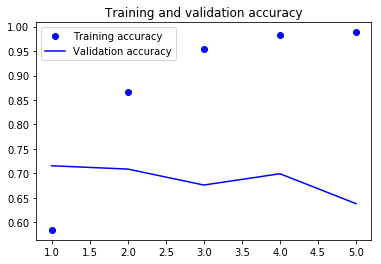

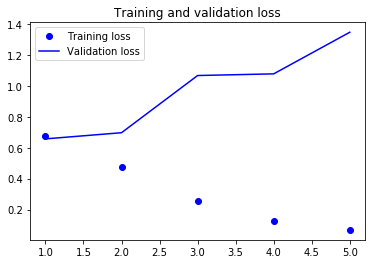

In [99]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('acc_whatisgoingonhere.png', format='png', bbox_inches='tight', dpi=100)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss_whatisgoingonhere.png', format='png', bbox_inches='tight', dpi=100)
#????
plt.show()

In [100]:
from sklearn.metrics import confusion_matrix

In [114]:
def plot_confusion_matrix(y_test, test_predictions, labels, label_override=[], save_suffix=''):
    """
    calculate and, more importantly, plot the confusion matrix
    :param y_test: test labels
    :param test_predictions: predictions fro X_test
    :param sortedLabels: list of labels used for the axes' labels
    :param saveSuffix: used to save different runs to a different file
    :return:
    """
    
   
    confusion = confusion_matrix(y_test, test_predictions, labels=labels)
    print(confusion)

    row_sums = np.sum(confusion, axis=1)
    norm_conf = (confusion.T / row_sums).T
    fig = plt.figure(figsize=(20,20))
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    # ax.xticks(range(0,1), fontsize=10)
    # ax.tick_params(axis='both' labelsize=27)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet,
                    interpolation='nearest')

    width, height = confusion.shape

    plt.tick_params(axis='both', which='major', labelsize=30)
    plt.tick_params(axis='both', which='minor', labelsize=30)
       
    # numbers of predictions in each bucked/square    
    #for x in range(width):
    #    for y in range(height):
    #        ax.annotate(str(confusion[x][y]), xy=(y, x),
    #                    horizontalalignment='center',
    #                    verticalalignment='center',
    #                    fontsize=30
    #                   )

    cb = fig.colorbar(res)
    cb.ax.tick_params(labelsize=25)
    # screw up the tick labels
    # cb = fig.colorbar(res, ticks=None)
    # cb.ax.tick_params(labelsize=20)
    #cb.ax.set_xticklabels(['1','0'])
    if label_override:
        plt.xticks(range(width), label_override[:width])#, rotation=90)
        plt.yticks(range(height), label_override[:height])
    else:
        plt.xticks(range(width), labels[:width])#, rotation=90)
        plt.yticks(range(height), labels[:height])
    #plt.xlabel('Predicted', fontsize=35, fontweight='bold')
    #plt.ylabel('True', fontsize=35, fontweight='bold')
    # plt.title('Confusion matrix for Exception Type Codes', fontsize=40, fontweight='bold')
    
    # save matrix
    plt.savefig('confusion_matrix' + save_suffix+ '.png', format='png', bbox_inches='tight', dpi=100)

In [ ]:
y_predict = func_model.predict(X_test_combined)
y_predict = [round(x[0]) for x in y_predict]

[[15127 58255]
 [    0   114]]


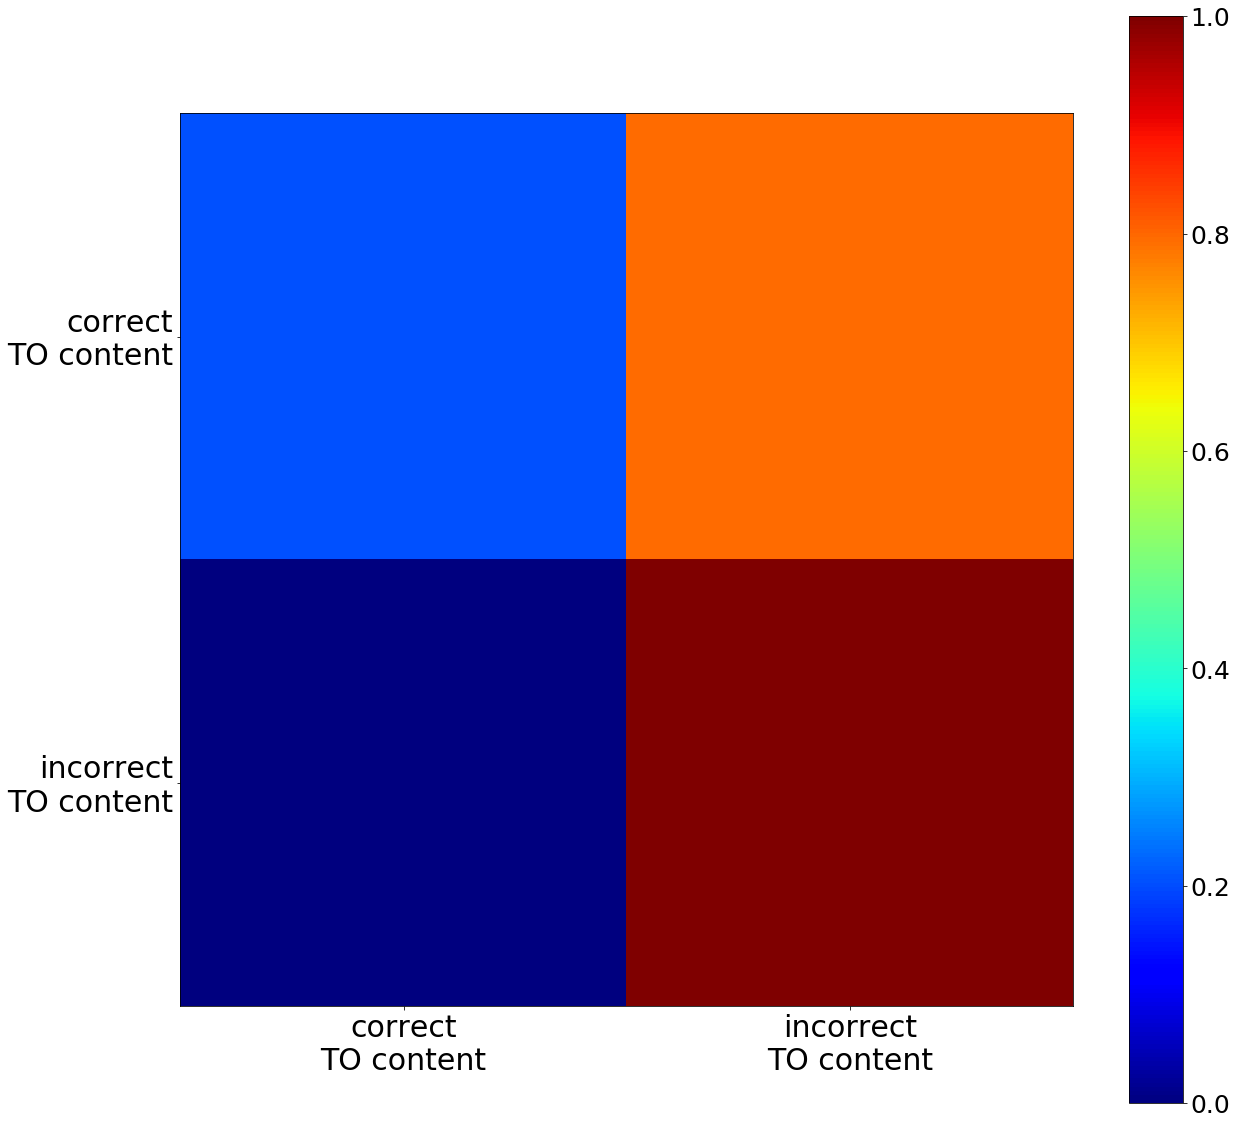

In [116]:
plot_confusion_matrix(y_test=y_test, test_predictions=y_predict, labels=[0,1], label_override=['correct\nTO content', 'incorrect\nTO content'], save_suffix='network')
#plot_confusion_matrix(label_override=['correct TO','incorrect TO content','other exception'],y_test=y_test, test_predictions=y_predict, labels=[0,1,2], save_suffix='forest')

[[15127     0]
 [    0 58369]]


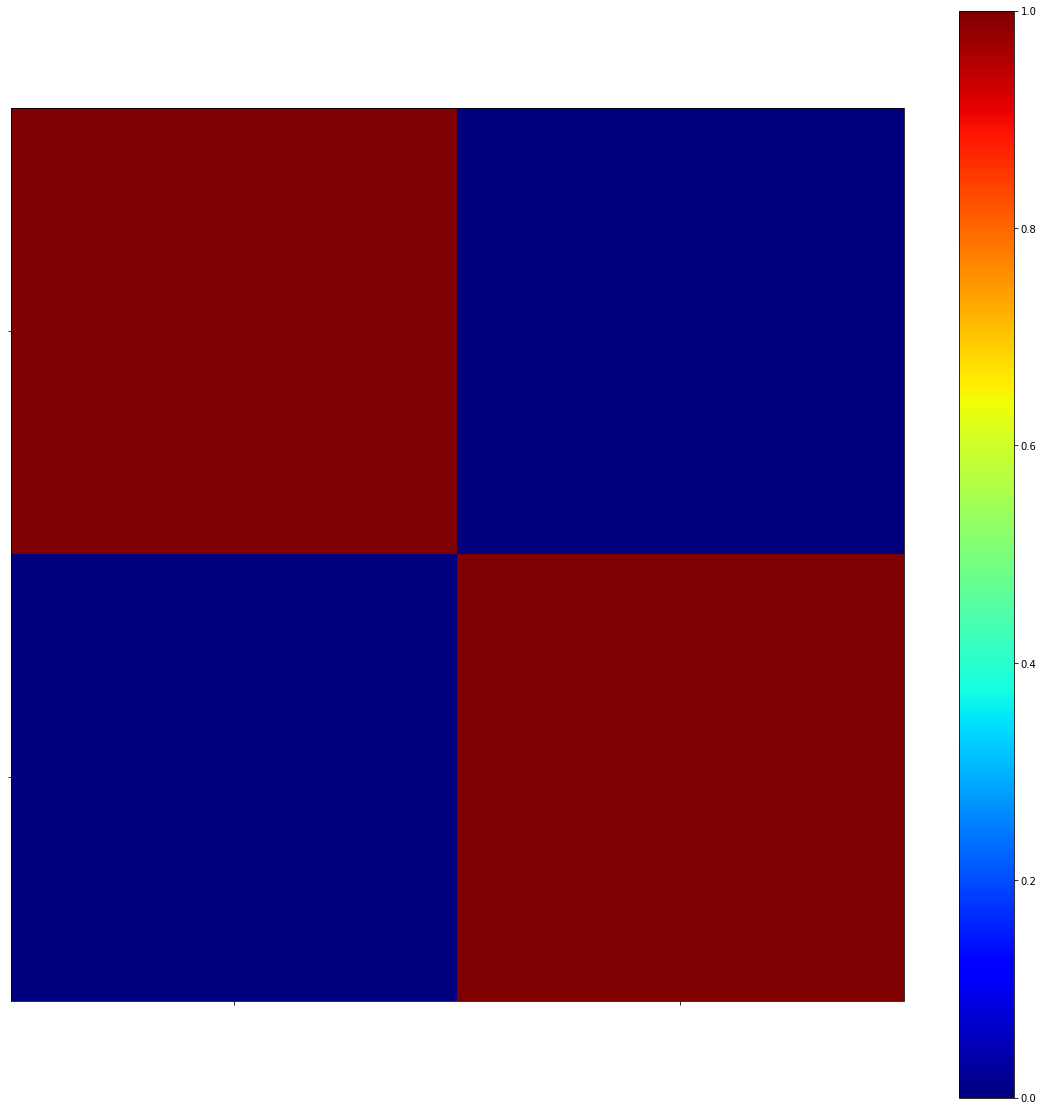

In [110]:
plot_confusion_matrix(y_test=y_predict, test_predictions=y_predict, labels=[0,1],label_override = ["",""], save_suffix='network_optimal')
